# 개요
* 머신러닝의 개념
  + Supervised vs. Unsupervised
* Machine Learning Process
  + 일반적인 절차와 과정
  + Training-set vs. Test-set
  + Correctness (평가하기)
  
## Machine Learning
* 일반적인 컴퓨터 프로그램은?
  + 사람이 문제를 풀고, 그 해답을 프로그램으로 구현한다
  + 또는 문제푸는 원리나 방법을 프로그램으로 구현한다
  + 예) 양력을 음력으로 변환, 전형적인 계산기, 통계SW 등 우리가 아는 대부분의 프로그램
* Machine Learning
  + 기계(컴퓨터 프로그램)를 공부시킨다 &rarr; 공부한 기계가 문제를 푼다
    - 문제를 푸는 알고리즘이 아니라, 문제 푸는 방법을 학습하는 알고리즘을 프로그램으로 구현
    - "문제 푸는 방법을 학습하는 알고리즘"을 "모델(Model)"이라고 한다
  + 일반적으로 "공부(학습, Training)" 과정이 필요하다
  + 공부한 내용이나 정도에 따라 결과가 달라질 수 있다
    - 같은 입력에 대해 항상 같은 결과가 나오지는 않는다 
  + 공부하지 않은 내용에 대해서도 답을 낼 수 있다 (충실히 공부할수록 더 좋은 답을 낸다)
  + 기계가 학습할 수 있는 데이터가 있어야한다 (데이터를 가지고 공부한다)
  + 예) 축구선수 경기평점 계산기
    - 경기 기록을 토대로 평점을 계산하는 공식이 있다 (Not Machine Learning)
    - 평점 계산하는 공식이 없다 (Machine Learning)
    
    
## 이런 문제를 풀 수 있다
* 이메일이 스팸인가 아닌가?
* 신용카드 거래가 정상적인가 비정상적인가?
* 쇼핑고객이 클릭할 가능성이 높은 상품은 무엇인가?
* K리그에서 어느 팀이 우승할까?


## Supervised vs Unsupervised
* Supervised
  + 알고있는 정답을 가지고 학습한 후, 학습한 내용을 바탕으로 결과를 낸다
  + 예) 스팸 메일 판별기
    - 스팸 메일인지 아닌지 알고 있는 메일 샘플들을 가지고 학습한다
  + 예) 환자 자동진단
    - 환자들의 증상과 진단결과를 이용하여 학습 &rarr; 증상이 주어졌을 때 진단명 예측하기 
* Unsupervised
  + 학습 과정 없이 알아서 처리한다.
  + 예) 환자들의 증상이 주어졌을 때, 비슷한 증상이 나타나는 환자군들로 자동분류하기
* 대부분의 머신러닝 응용은 Supervised Learning을 사용


## Overfitting vs. Underfitting
* Overfitting (너무 곧이 곧대로 학습)
  + 주어진 데이터에 너무 충실하게 학습하면 새로운 데이터에 대해 적응하지 못한다
* Underfitting (약간 건성건성 학습)
  + 너무 건성건성 학습하면 정확한 답을 내지 못한다
* 적당한 수준에서 학습(Fitting)해야 한다
  + Overfitting 안되게, 그렇다고 Underfitting 안되게
  + 학습 데이터셋을 잘 만들어야하며, 여러가지 변수를 조정하면서 반복... 반복...

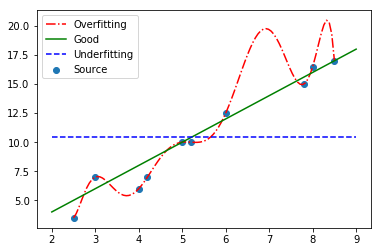

In [44]:
xy = [(2.5,3.5), (3,7), (4,6), (4.2,7), (5,10), (5.2,10), (6,12.5), (7.8, 15), (8,16.5), (8.5, 17)]
x = [d[0] for d in xy]
y = [d[1] for d in xy]

import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

# 300 represents number of points to make between min and max
xnew = np.linspace(2.5, 8.5, 100) 

spl = make_interp_spline(x, y, k=9)  # type: BSpline
ynew = spl(xnew)

plt.scatter(x,y,  label="Source")
plt.plot(xnew, ynew, 'r-.', label="Overfitting")
plt.plot([2,9], [4,18], 'g', label="Good")
plt.plot([2,9], [np.mean(y), np.mean(y)], 'b--', label="Underfitting")
plt.legend()
plt.show()


* 위 그림에서 사용한 Source Data를 살펴보면, 대략 $y=2x$ 정도의 관계임을 짐작할 수 있다 (그냥 찍어보니까...)
* (초록) 잘 학습된 예측기는 $y=2x$에 근접한 수식을 얻을 것이다.
  - 새로운 입력으로 $x=7$을 받았을 때, $y=14$라고 예측할 것이다
* (빨강) 주어진 샘플 데이터에는 정확히 대응하지만, 새로운 입력이 들어오면 엉뚱한 답을 낼 수 있다. (쓸데없이 고차 방정식을 풀었다)
* (파랑) $y$값의 평균으로 답을한다. 너무 엉성하다.

# Training set vs.Test set
* Training set : 훈련/학습용 데이터
* Test set : 평가용 데이터
* 뭔가 머신러닝을 돌리고자하는 데이터셋이 있을 때, 적당한 비율로 학습용 데이터넷과 훈련용 데이터셋으로 나눈다
  + 예) 1만개의 데이터가 있다. 
    - 8천개를 랜덤하게 추출해서 학습(Training)을 시키고, 나머지 2천개를 이용하여 채점(Test)해 본다
* Supervised Learning에서는 항상 쓰이는 도구이다

In [45]:
import random
from typing import TypeVar, List, Tuple
X = TypeVar('X')  # generic type to represent a data point

def split_data(data: List[X], prob: float) -> Tuple[List[X], List[X]]:
    """Split data into fractions [prob, 1 - prob]"""
    data = data[:]                    # Make a shallow copy
    random.shuffle(data)              # because shuffle modifies the list.
    cut = int(len(data) * prob)       # Use prob to find a cutoff
    return data[:cut], data[cut:]     # and split the shuffled list there.

data = [n for n in range(1000)]
train, test = split_data(data, 0.75)

# The proportions should be correct
assert len(train) == 750
assert len(test) == 250

# And the original data should be preserved (in some order)
assert sorted(train + test) == data

In [46]:
Y = TypeVar('Y')  # generic type to represent output variables

def train_test_split(xs: List[X],
                     ys: List[Y],
                     test_pct: float) -> Tuple[List[X], List[X], List[Y], List[Y]]:
    # Generate the indices and split them.
    idxs = [i for i in range(len(xs))]
    train_idxs, test_idxs = split_data(idxs, 1 - test_pct)

    return ([xs[i] for i in train_idxs],  # x_train
            [xs[i] for i in test_idxs],   # x_test
            [ys[i] for i in train_idxs],  # y_train
            [ys[i] for i in test_idxs])   # y_test

xs = [x for x in range(1000)]  # xs are 1 ... 1000
ys = [2 * x for x in xs]       # each y_i is twice x_i
x_train, x_test, y_train, y_test = train_test_split(xs, ys, 0.25)

# Check that the proportions are correct
assert len(x_train) == len(y_train) == 750
assert len(x_test) == len(y_test) == 250

# Check that the corresponding data points are paired correctly.
assert all(y == 2 * x for x, y in zip(x_train, y_train))
assert all(y == 2 * x for x, y in zip(x_test, y_test))

In [68]:
%%html
<style>
table {float:left}
</style>

# Correctness
* 잘 공부했는지를 어떻게 판단할 것인가? (객관적인 지표가 필요하다)
* Yes/No 단답형 예측기
  + 예) 스팸 메일인가(Yes)? 아닌가(No)?
  + 예) 내일 비가 올까(Yes)? 안올까(No)?
  + 예) 물건을 살까(Yes)? 안살까(No)?
* Accuracy
  + 전체 예측 중에서 몇 개를 맞추었나?
* Precision
  + "Yes"라고 예측한 것 중에서 실제로 맞춘 것은 몇 개인가?
* Recall
  + 실제 "Yes"인 것 중에서 제대로 예측한 것은 몇 개인가?
* F1_score
  + Precision과 Recall의 조화평균 (Harmonic mean)
  
### Confusion Matrix
* Yes/No 단답형 예측기의 테스트 결과(성능)를 표현할 때 많이 사용됨

|                 | Yes                   | No                   |
| :---------------|----------------------|-----------------------|
| Predict "Yes"   | True Positive (TP)  | False Positive (FP) |
| Predict "No"    | False Negative (FN) | True Negative (TN)  |


###  예) 백혈병에 걸릴지 안걸릴지를 예측하기
* 말도 안되는 알고리즘 : 이름이 "Luke"이면 "Leukemia(백혈병)"에 걸린다고 판단
* 그냥 "Luke"와 "Leukemia"가 서로 비슷하니까!
* 백만명의 샘플에 대해 테스틀 해 봤더니... 

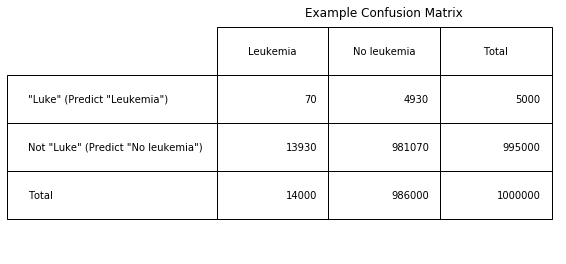

In [84]:
# Pyplot을 이용해 Confusion 그려보자 (심심풀이 - 아무의미 없음)
table_data = [[ 70, 4930, 5000],
        [ 13930, 981070, 995000],
        [14000, 986000, 1000000]]
        
columns = ('Leukemia', 'No leukemia', 'Total')       
rows = [ '"Luke" (Predict "Leukemia")', 'Not "Luke" (Predict "No leukemia")', 'Total']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

the_table = ax.table(cellText=table_data,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='upper center')
the_table.scale(1,4)
ax.axis('off')
plt.title('Example Confusion Matrix')
plt.show()

In [82]:
def accuracy(tp: int, fp: int, fn: int, tn: int) -> float:
    correct = tp + tn
    total = tp + fp + fn + tn
    return correct / total

assert accuracy(70, 4930, 13930, 981070) == 0.98114

def precision(tp: int, fp: int, fn: int, tn: int) -> float:
    return tp / (tp + fp)

assert precision(70, 4930, 13930, 981070) == 0.014

def recall(tp: int, fp: int, fn: int, tn: int) -> float:
    return tp / (tp + fn)

assert recall(70, 4930, 13930, 981070) == 0.005

def f1_score(tp: int, fp: int, fn: int, tn: int) -> float:
    p = precision(tp, fp, fn, tn)
    r = recall(tp, fp, fn, tn)

    return 2 * p * r / (p + r)


print( "Accuracy  ", accuracy(70, 4930, 13930, 981070) )
print( "Precision ", precision(70, 4930, 13930, 981070) )
print( "Recall    ", recall(70, 4930, 13930, 981070) )
print( "F1-Score  ", f1_score(70, 4930, 13930, 981070) )

Accuracy   0.98114
Precision  0.014
Recall     0.005
F1-Score   0.00736842105263158


* Accurracy를 측정해보면 의외로 높게 나온다
  + ${(70+981070) \over (70+4930+13930+981070)}=0.98114$
  + 이유 : 이름이 "Luke"가 아니면서 "Leukemia(백혈병)"에 걸리지도 않은 사람이 대부분이다 (98.1%)
  + 심지어 이름과 상관없이 무조건 "No"라고 대답해도 98.6%의 정확도가 나온다 (&larr; "정확도"의 맹점)
    - ${986000 \over 1000000}=0.986$
    - 백만명 중에 백혈병에 걸린 사람은 14000명에 불과함
* 이럴 때는 Precision과 Recall을 함께 살펴봐야 한다
  + Precision : 이름이 "Luke"라서 백혈병에 걸린다고 예측했는데, 실제로 백혈병에 걸린 사람은?
    - ${70 \over (70+4930)}=0.014$
    - 매우 낮다
  + Recall : 백혈병에 걸린 사람 중에, 이름이 "Luke"인 사람은? (백혈병에 걸린 사람중에, 예측기가 이름만 가지고 맞춘 사람은?)
    - ${70 \over (70+13930)}=0.005$
    - 매우 매우 낮다